Lab # 1
Timofeenko Boris

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import precision_recall_curve
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

import numpy as np
import pandas as pd

EPS = 0.001
RAND_STATE = 1337
PAD_LENGTH = 30

def print_padded_title(title):
  print('='.ljust(PAD_LENGTH, '='))
  print('{}'.format(title))
  print('='.ljust(PAD_LENGTH, '='))


In [ ]:
drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/My Drive/bioresponse.csv")
assert df.to_numpy().max() <= 1 + EPS and df.to_numpy().min() >= 0 - EPS #Check if data is already in range 0..1
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [ ]:
y = df['Activity'].values
x = df.drop(['Activity'], axis=1)

# Create Train and Test samples
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=RAND_STATE)

In [ ]:
clfs = [
      tree.DecisionTreeClassifier(random_state = RAND_STATE, max_depth = 3), #small tree
      tree.DecisionTreeClassifier(random_state = RAND_STATE, max_depth = 17), #deep tree
      RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = RAND_STATE), # Small Random Forest
      RandomForestClassifier(n_estimators = 50, max_depth = 17, random_state = RAND_STATE), # Deep Random Forest
      # Compare different classifiers to reduce False Negatives (i.e. maximize recall) on current dataset
      KNeighborsClassifier(),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(),
      GaussianNB(),
      QuadraticDiscriminantAnalysis(),   
      SGDClassifier(max_iter=1000, tol=1e-3, loss='log'),      
]
clf_names = ['Small tree', 'Deep Tree', 'Small Random Forest', 'Deep Random Forest', 'K-Neighbours', 'MLPC', 'AdaBoost', 'GaussianNB', "QDA", "SGD"]
predictions_list = []
probabilities_list = []
for i, clf in enumerate(clfs):
  clf.fit(x_train, y_train)
  predictions = clf.predict(x_test)
  # Probabilities for the objects in the test sample
  probabilities = clf.predict_proba(x_test)
  print_padded_title(clf_names[i])
  print('accuracy', metrics.accuracy_score(y_test, predictions) )
  print('precision', metrics.precision_score(y_test, predictions) )
  print('recall', metrics.recall_score(y_test, predictions) )
  print('roc_auc', metrics.roc_auc_score(y_test, predictions) )
  print('F1-score', metrics.f1_score(y_test, predictions) )
  print('Log loss', metrics.log_loss(y_test, predictions) )
  predictions_list.append(predictions)
  probabilities_list.append(probabilities)

Small tree
accuracy 0.7637655417406749
precision 0.7612809315866085
recall 0.8368
roc_auc 0.7547273453093812
F1-score 0.7972560975609756
Log loss 8.159365590608166
Deep Tree
accuracy 0.7442273534635879
precision 0.7696
recall 0.7696
roc_auc 0.7410874251497005
F1-score 0.7696
Log loss 8.834176504231104
Small Random Forest
accuracy 0.7193605683836589
precision 0.7440758293838863
recall 0.7536
roc_auc 0.7151233532934131
F1-score 0.7488076311605724
Log loss 9.693057615964003
Deep Random Forest
accuracy 0.7992895204262878
precision 0.8222940226171244
recall 0.8144
roc_auc 0.7974195608782435
F1-score 0.8183279742765273
Log loss 6.932372487537421
K-Neighbours
accuracy 0.7397868561278863
precision 0.7618296529968455
recall 0.7728
roc_auc 0.735701397205589
F1-score 0.7672756155679111
Log loss 8.987550819645461
MLPC
accuracy 0.7682060390763765
precision 0.7520775623268698
recall 0.8688
roc_auc 0.7557572854291418
F1-score 0.8062360801781737
Log loss 8.006006897878946
AdaBoost
accuracy 0.755772646

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA
accuracy 0.5559502664298401
precision 0.6006441223832528
recall 0.5968
roc_auc 0.5508950099800399
F1-score 0.5987158908507223
Log loss 15.337110566268233
SGD
accuracy 0.716696269982238
precision 0.7931034482758621
recall 0.6624
roc_auc 0.7234155688622754
F1-score 0.7218831734960768
Log loss 9.785040876109209


In [ ]:
graph = Source(tree.export_graphviz(clfs[0], out_file=None))
SVG(graph.pipe(format='svg'))
pass #delete this line to show graph

Small tree


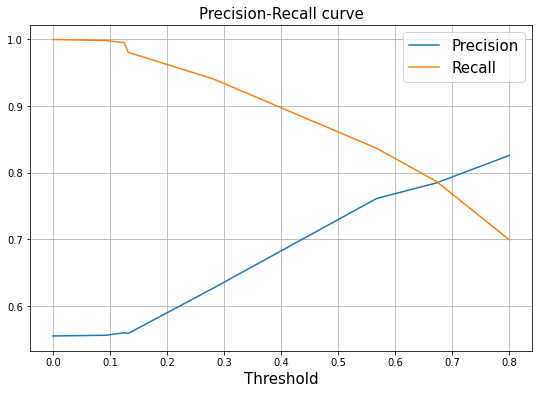

Deep Tree


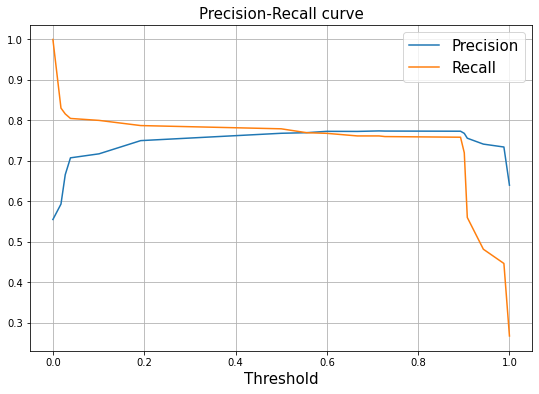

Small Random Forest


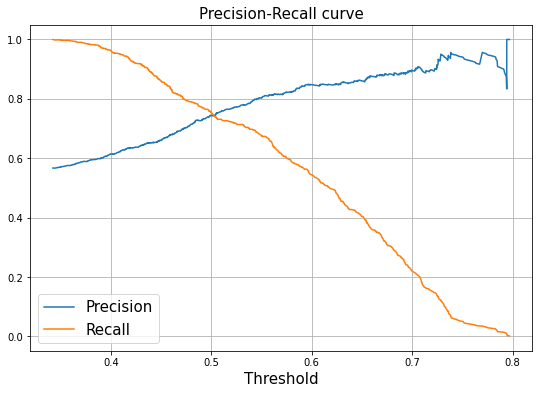

Deep Random Forest


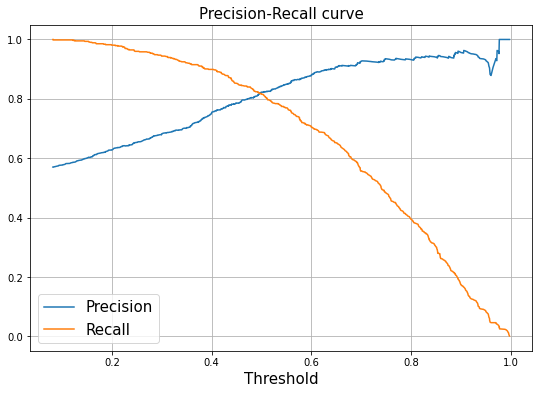

K-Neighbours


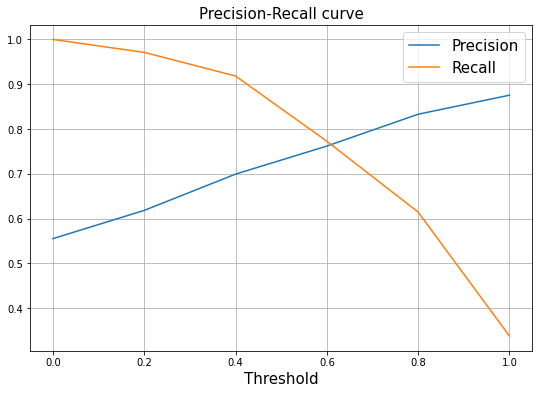

MLPC


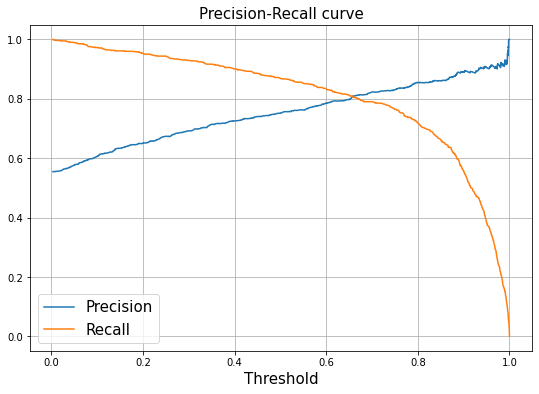

AdaBoost


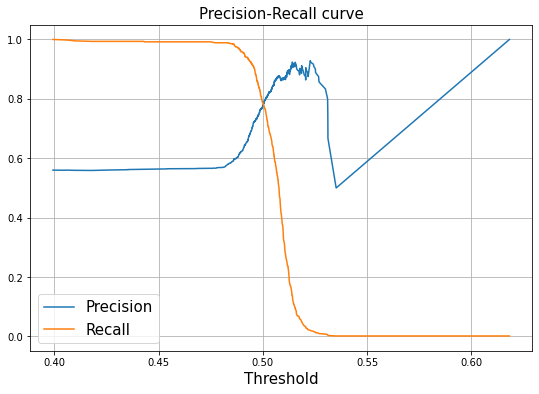

GaussianNB


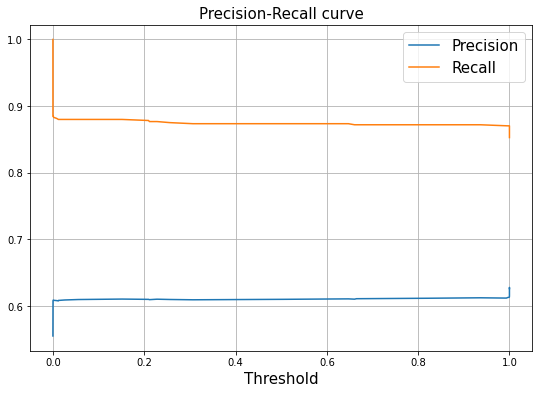

QDA


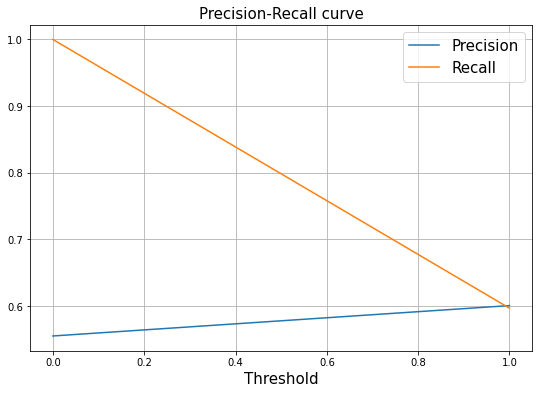

SGD


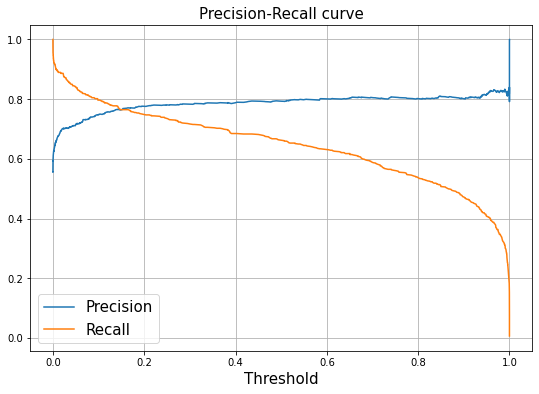

In [ ]:
for i, (predictions, probabilities) in enumerate(zip(predictions_list, probabilities_list)):
  print_padded_title(clf_names[i])
  prec, rec, thresh = precision_recall_curve(y_test, probabilities[:,1])
  plt.figure(figsize=(9, 6))
  plt.grid()
  plt.plot(thresh, prec[:-1], label="Precision")
  plt.plot(thresh, rec[:-1], label="Recall")
  plt.xlabel(u"Threshold",fontsize = 15)
  plt.title(u'Precision-Recall curve',fontsize = 15)
  plt.legend(fontsize = 15)
  plt.show()

Small tree


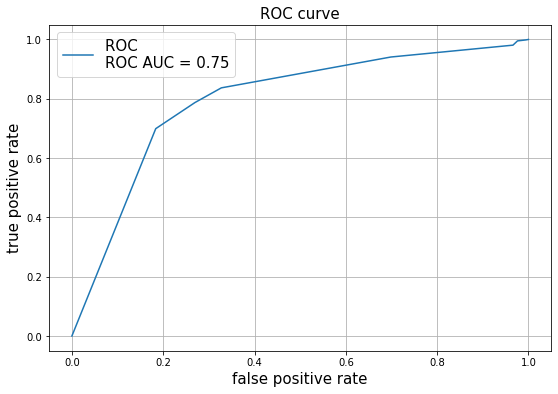

Deep Tree


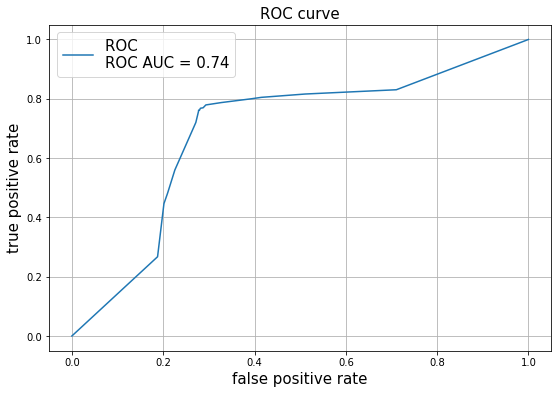

Small Random Forest


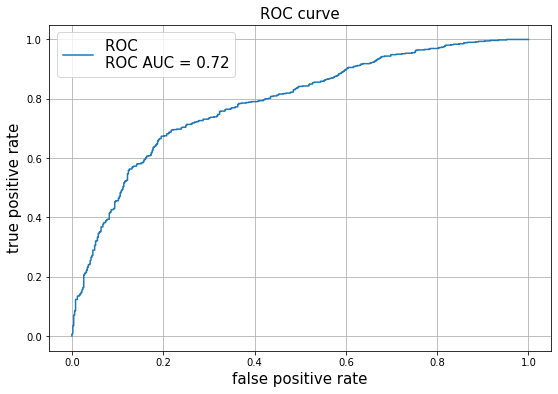

Deep Random Forest


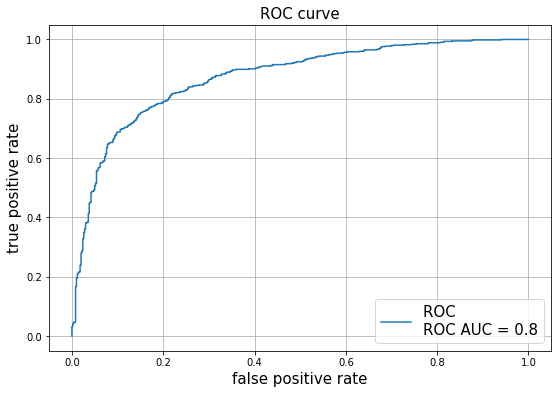

K-Neighbours


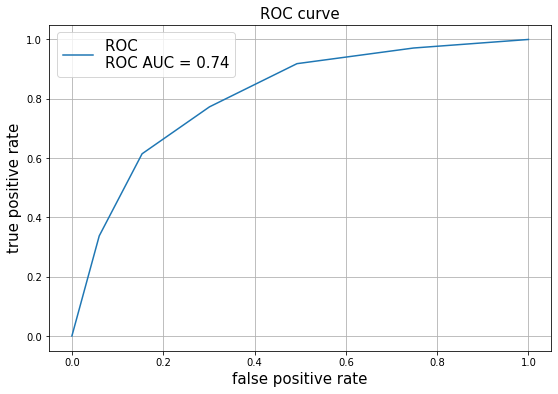

MLPC


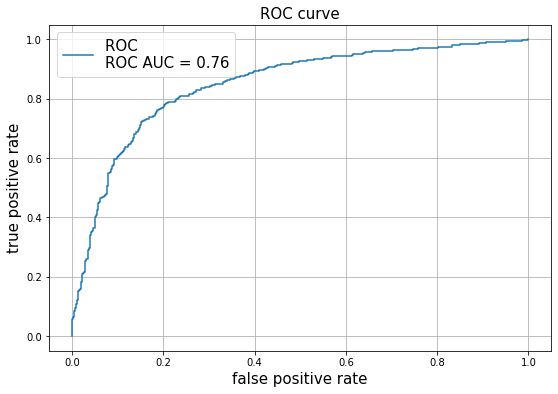

AdaBoost


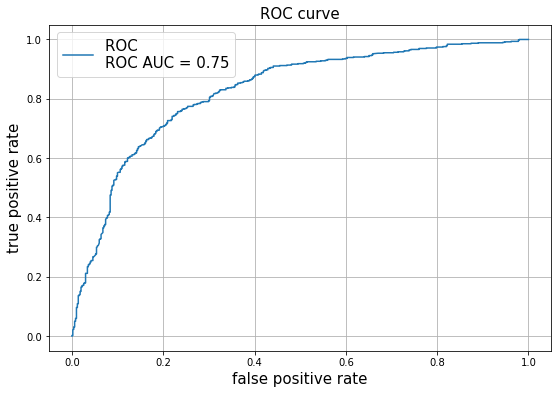

GaussianNB


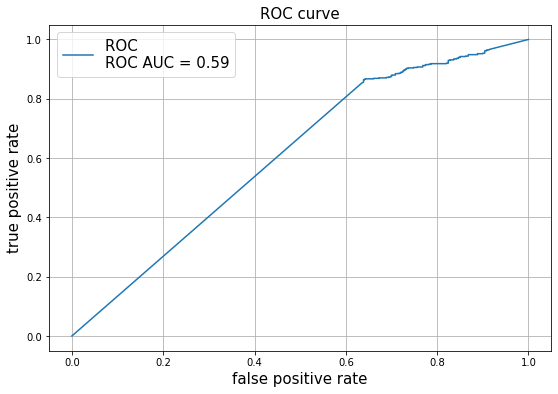

QDA


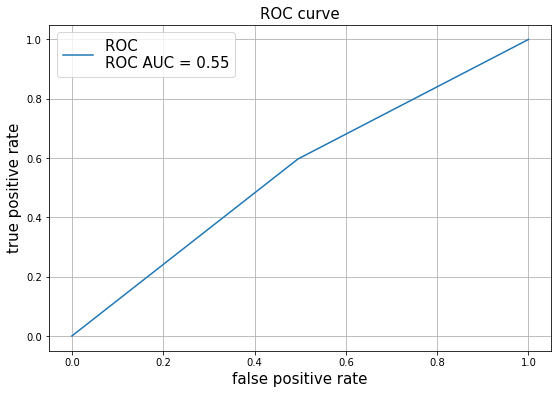

SGD


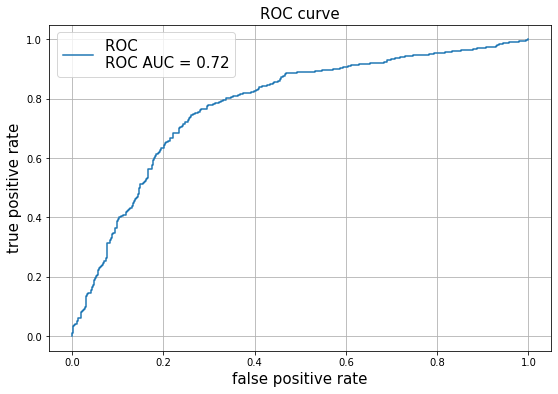

In [ ]:
# ROC-curve
for i, (predictions, probabilities) in enumerate(zip(predictions_list, probabilities_list)):
  print_padded_title(clf_names[i])
  fpr, tpr, thr = roc_curve(y_test, probabilities[:,1])

  plt.figure(figsize = (9,6))
  plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(metrics.roc_auc_score(y_test, predictions),2)))
  plt.grid()
  plt.xlabel("false positive rate",fontsize = 15)
  plt.ylabel("true positive rate",fontsize = 15)
  plt.title(u"ROC curve",fontsize = 15)
  plt.legend(fontsize = 15)
  plt.show()

Conclusion: from all these classifiers, **GaussianNB** and **MLPC** minimize False Negatives (maximize recall) better than others.
